# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Region and Domain:

### Singapore Region seasonal temperatures compared with New Delhi and New York

#### Data Links
##### Singapore-
https://github.com/karthikeyansomu/Seasonal-Temperatures/raw/master/Singapore%20surface-air-temperature-monthly-mean.csv

(or)

https://data.gov.sg/dataset/surface-air-temperature-monthly-mean

##### New York-
https://github.com/karthikeyansomu/Seasonal-Temperatures/blob/master/New%20york%20monthlyannualtemp.xlsx?raw=true

(or)

https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf

#### Importing Libraries

In [735]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

#### Importing Tables

In [736]:
nycloc = 'https://github.com/karthikeyansomu/Seasonal-Temperatures/blob/master/New%20york%20monthlyannualtemp.xlsx?raw=true'
sinloc = 'https://github.com/karthikeyansomu/Seasonal-Temperatures/raw/master/Singapore%20surface-air-temperature-monthly-mean.csv'

nyc = pd.read_excel(nycloc)
sin = pd.read_csv(sinloc)

#### Cleaning and sorting the Data

In [737]:
## CLEANING New York DATA First

# Removing Nan Values and setting column headers
nyc = nyc.dropna()
nyc.columns = nyc.iloc[0]
nyc = nyc.drop(nyc.index[0])
nyc = nyc.reset_index(drop= True)

In [738]:
# Removing Annual Mean Data as it is not required in this representation
nyc = nyc.drop(['ANNUAL'],axis = 1)

In [739]:
# Converting Multiple columns to one Temperature column having Two Indexes
nyccols = ['YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [740]:
nyc.columns = nyccols

In [741]:
nyc = pd.melt(nyc, id_vars = ['YEAR'], value_vars = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
             var_name = 'MONTH', value_name = 'TEMPERATURE')

In [742]:
nyc['MONTH'] = nyc['MONTH'].astype(int)

In [743]:
nyc = nyc.sort_values(by = ['YEAR', 'MONTH'])

In [744]:
#nyc['MONTH'] = nyc['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [745]:
# Removing Data Before 1982 as the Singapore data Starts from 1982
nyc = nyc[nyc['YEAR'] >= 1982]

In [746]:
#nyc =nyc.set_index(['YEAR'], drop=True)

In [747]:
# Converting Farhenheit to Celcius
#(°F - 32) x 5/9 = °C
nyc['TEMPERATURE'] = (nyc['TEMPERATURE']-32)* 5/9

In [748]:
nyc.head()

,YEAR,MONTH,TEMPERATURE
113,1982,1,-3.27778
264,1982,2,1.83333
415,1982,3,5.55556
566,1982,4,10.6667
717,1982,5,17.8333


In [749]:
## CLEANING Singapore DATA
# Splitting a Column with year-month data into Year and Month
sin['month'] = pd.to_datetime(sin['month'], format = '%Y-%m')

In [750]:
sin['YEAR'] = sin['month'].dt.year
sin['MONTH'] = sin['month'].dt.month

In [751]:
keepcols = ['YEAR', 'MONTH' , 'mean_temp']
sin = sin[keepcols]

In [752]:
#sin['MONTH'] = sin['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [753]:
sin = sin.rename(columns = {'mean_temp':'TEMPERATURE'})

In [754]:
# Removing data after 2019 as the New York Data does not have 2020 data
sin = sin[sin['YEAR'] <= 2019]

In [755]:
#sin = sin.set_index(['YEAR'], drop=True)

In [756]:
sin.head()

,YEAR,MONTH,TEMPERATURE
0,1982,1,25.9
1,1982,2,27.1
2,1982,3,27.2
3,1982,4,27.0
4,1982,5,28.0


#### Plotting Temperature vs Month from 1982 to 2019

<IPython.core.display.Javascript object>


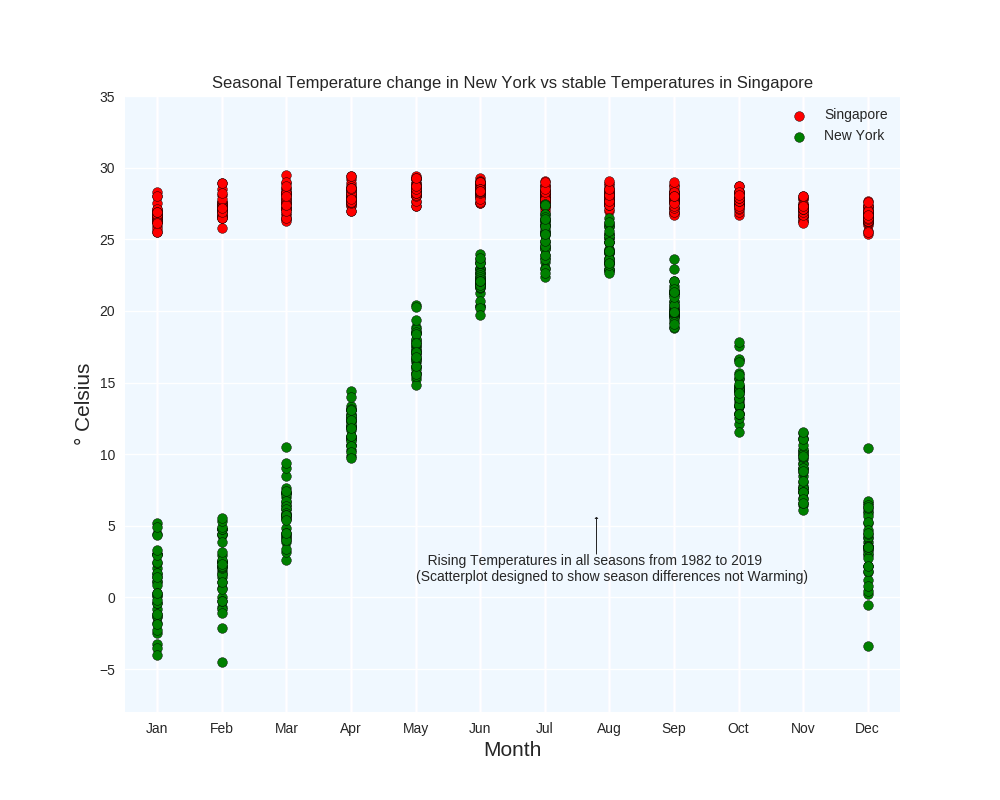

In [771]:
plt.figure(figsize = (10,8))

plt.scatter(sin['MONTH'], sin['TEMPERATURE'], color = 'red', label = 'Singapore', edgecolors = 'black');
plt.scatter(nyc['MONTH'], nyc['TEMPERATURE'], color = 'green', label = 'New York', edgecolors = 'black');
plt.title('Seasonal Temperature change in New York vs stable Temperatures in Singapore')
plt.axis = True

plt.ylim(-8,35)
plt.xlim(0.5,12.5)
plt.legend(loc='best')
plt.xlabel('Month', fontsize=15)
plt.ylabel('° Celsius', fontsize=15)

ax = plt.gca()

#for i in ax.spines:
#    i.set_linewidth(0.3)
    
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.xticks(sin['MONTH'], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'));
ax.set_facecolor('aliceblue')

s = '''   Rising Temperatures in all seasons from 1982 to 2019
(Scatterplot designed to show season differences not Warming)
'''
plt.text(5,0, s)
plt.arrow(7.8,3, 0,2.5,fc="k", ec="k",head_width=0.05, head_length=0.1)

plt.show()

##### Singapore experiences very small deviations in ambient temperature throughout the year while New York ambient temperatures vary from below Zero to around 25 Degrees Celcius